### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

自变量是文字条件是否一致（文字与其印刷油墨是否匹配），因变量是参与者说出墨色名称的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

#### 1. 定义数学符号
- $H_0$表示零假设，$H_a$表示对立假设。
- $\mu_0$表示一致文字条件下的总体均值，$\mu$表示不一致文字条件下的总体均值
- $n$表示样本量

#### 2.假设
- 零假设：不一致文字条件下，参与者说出墨色名称的时间与一致文字条件下的相同；
- 对立假设：不一致文字条件下，参与者说出墨色名称的时间与一致文字条件下的时间不同；
- $H_0:\ \mu=\mu_0$
- $H_a:\ \mu\ne\mu_0$

#### 3. 统计检验
选择配对样本的双尾t检验，置信度选择99%。
1. 样本量较少，总体参数未知；
2. 两个样本是同一受试对象接受不同处理获得的两组数据，样本间不是相互独立的，所以属于相依样本；
3. 两个样本数据的差值呈现正态分布，可以进行t检验。
3. 对立假设验证的是在不同条件下的因变量不同，所以选择双尾检验。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [2]:
import pandas as pd
f = pd.read_csv('stroopdata.csv')

In [4]:
f.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [28]:
range=f.max()-f.min()
range

Congruent      13.698
Incongruent    19.568
dtype: float64

In [14]:
f.median(0)

Congruent      14.3565
Incongruent    21.0175
dtype: float64

#### 集中趋势测量
| |一致文字条件|不一致文字条件|
|---|
|均值|14.051|22.016|
|中位数|114.3565|21.0175|

#### 变异测量
| |一致文字条件|不一致文字条件|
|---|
|标准差|3.559|4.797|
|极差|13.698|19.568|
|四分位矩|4.3055|5.33475|

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

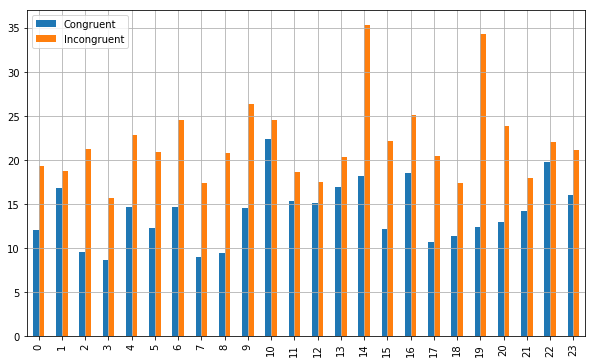

In [23]:
import matplotlib
f.plot(kind="bar", grid=True, figsize=(10,6))

蓝色柱代表一致文字条件下参与者说出墨色名称的时间，橙色柱代表不一致文字条件下参与者说出墨色名称的时间。
从图中可以明显看出参与者在不一致文字条件下说出墨色名称的时间普遍长于一致文字条件下的时间。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [35]:
from scipy.stats import ttest_rel
ttest_rel(f['Incongruent'], f['Congruent'])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

- 置信水平为99%， 所以显著性水平$\alpha=1\%$
- 该实验中的自由度为$degree\ of\ freedom=n-1=23$
- 由于选择了双尾检验，由t值表可得，该实验中的t临界值为$\mp2.807$
根据配对样本t检验的结果：
- $t-statistic=8.02>2.807，p-value=4.103\times10^-8$
$p-value<\alpha$
- 可以成功拒绝零假设

#### 结论：
- 不一致文字条件下，参与者说出墨色名称的时间与一致文字条件下的时间不同
- 该结论与期望一致